In [1]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import absolute
from numpy import sqrt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
import pickle5 as pickle
import matplotlib.pyplot as plt
from matplotlib import rcParams
import statsmodels.formula.api as smf
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.nonparametric.smoothers_lowess import lowess
import numpy as np
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
import scipy.stats as stats

In [3]:
four_years_df = pd.read_pickle("cleaned_df.pkl")
four_years_df = four_years_df[four_years_df['MP']>250]
four_years_df = four_years_df.drop(['POS','Name','YEAR','Season','through_4_years','WITH SHOES','MP'],axis=1)
four_years_df = pd.get_dummies(four_years_df)


In [4]:
def resd_vs_fitted(preds,y_test):
    residuals = y_test - preds
    fitted = preds
    smoothed = lowess(residuals,fitted)
    top3 = abs(residuals).sort_values(ascending = False)[:3]

    plt.rcParams.update({'font.size': 16})
    plt.rcParams["figure.figsize"] = (8,7)
    fig, ax = plt.subplots()
    ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
    ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
    ax.set_ylabel('Residuals')
    ax.set_xlabel('Fitted Values')
    ax.set_title('Residuals vs. Fitted')
    ax.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)

    for i in top3.index:
        ax.annotate(i,xy=(fitted[i],residuals[i]))

    plt.show()

In [5]:
def select_pos_target_perform_ridge(pos,target,four_years_df):
    four_years_df = four_years_df[four_years_df[pos]==1]
    X_train, X_test, y_train, y_test = train_test_split(four_years_df.drop(['BPM','Avg_BPM'],axis=1), four_years_df[target], test_size = .3, random_state = 3)

    assert X_test.shape[0] == y_test.shape[0], "wrong shapes for test set"
    assert X_train.shape[0] == y_train.shape[0], "wrong shapes for training set"
    

    alphas = 10**np.linspace(6,-2,50)*.5
    ridgecv = RidgeCV(alphas=alphas, normalize=True)
    ridgecv.fit(X_train, y_train)
    ridge_cvalpha = Ridge(alpha=ridgecv.alpha_, normalize=False)
    ridge_cvalpha.fit(X_train, y_train)
    Y_hat_ridge = ridge_cvalpha.predict(X_test)
    ridge_rmse = mean_squared_error(y_test,Y_hat_ridge,squared=False)
    ridge_mae = mean_absolute_error(y_test,Y_hat_ridge)
    
    print('Best Lasso Model: Root Mean Square Error{} Mean absolute error {}'.format(ridge_rmse,ridge_mae),"\n")
    return Y_hat_ridge, y_test 

In [6]:
#point guard model: first year Avg_BPM 
predicted_value, true_value = select_pos_target_perform_ridge('Pos_PG','Avg_BPM',four_years_df)



Best Lasso Model: Root Mean Square Error2.783789321456036 Mean absolute error 2.207131405740965 



Text(0.5, 0, 'Predicted')

Text(0, 0.5, 'Actuals')

Text(0.5, 1.0, 'PG First year BPM Model')

(-6.428962654465013, 0.9471436638890467, -9.3601766004415, 3.7601766004415005)

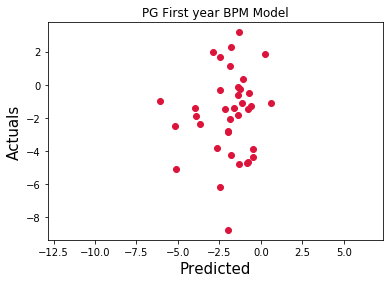

In [7]:
#Graph of point guard: first year BPM model
plt.scatter(predicted_value,true_value , c='crimson')

plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('PG First year BPM Model')
plt.axis('equal')
plt.show()

In [8]:
#Shooting guard first year BPM model
predicted_value, true_value = select_pos_target_perform_ridge('Pos_SG','BPM',four_years_df)



Best Lasso Model: Root Mean Square Error2.3629740931272294 Mean absolute error 1.9480935642700647 



Text(0.5, 0, 'Predicted')

Text(0, 0.5, 'Actuals')

Text(0.5, 1.0, 'SG First Year BPM Model')

(-7.999369497417433,
 -1.7225479922396587,
 -9.370176600441503,
 2.870176600441501)

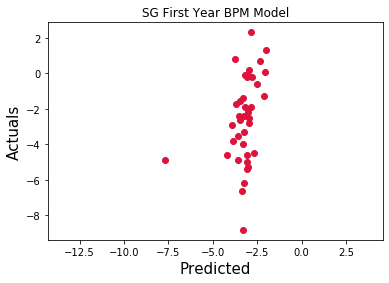

In [9]:
#Preds vs actual graphs
plt.scatter(predicted_value,true_value , c='crimson')

plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('SG First Year BPM Model')
plt.axis('equal')
plt.show()

In [10]:
#Small forward first year BPM model
predicted_value, true_value = select_pos_target_perform_ridge('Pos_SF','BPM',four_years_df)



Best Lasso Model: Root Mean Square Error2.6082240699617216 Mean absolute error 2.2163794999995927 



Text(0.5, 0, 'Predicted')

Text(0, 0.5, 'Actuals')

Text(0.5, 1.0, 'SF First year BPM Model')

(-5.223682868973233, 0.2889680248703298, -6.5651766004415, 1.165176600441501)

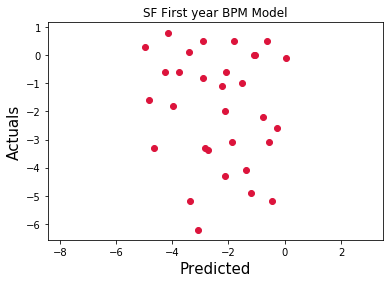

In [11]:
plt.scatter(predicted_value,true_value , c='crimson')

plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('SF First year BPM Model')
plt.axis('equal')
plt.show()

In [12]:
predicted_value, true_value = select_pos_target_perform_ridge('Pos_PF','BPM',four_years_df)


Best Lasso Model: Root Mean Square Error2.5036625938359625 Mean absolute error 1.9963487390064105 



Text(0.5, 0, 'Predicted')

Text(0, 0.5, 'Actuals')

Text(0.5, 1.0, 'PF First year BPM Model')

(-2.62314377925694, -2.5873961547272075, -9.391843267108172, 4.058509933774831)

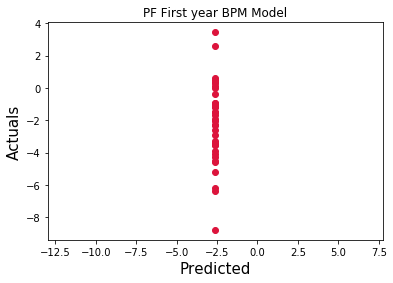

In [13]:
plt.scatter(predicted_value,true_value , c='crimson')

plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('PF First year BPM Model')
plt.axis('equal')
plt.show()

In [14]:
predicted_value, true_value = select_pos_target_perform_ridge('Pos_C','BPM',four_years_df)


Best Lasso Model: Root Mean Square Error1.6668106667336917 Mean absolute error 1.397729589126982 



Text(0.5, 0, 'Predicted')

Text(0, 0.5, 'Actuals')

Text(0.5, 1.0, 'C First year BPM Model')

(-2.680003517530998,
 -2.5905191708847677,
 -6.050176600441501,
 1.350176600441501)

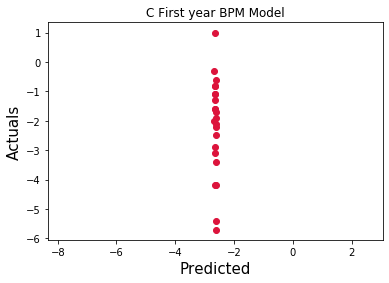

In [15]:
plt.scatter(predicted_value,true_value , c='crimson')

plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('C First year BPM Model')
plt.axis('equal')
plt.show()